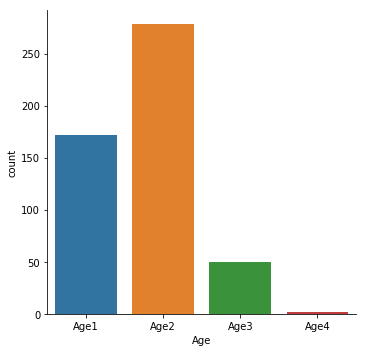

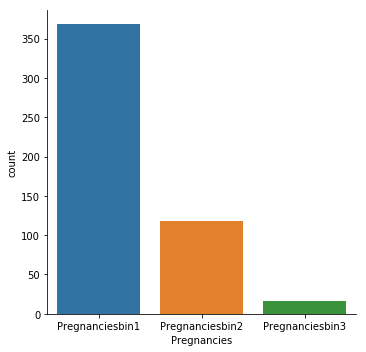

In [2]:
import seaborn as sns
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
# Question 6
df = pd.read_csv("Diabetes.csv")

for col in df.columns:   
    x=pd.to_numeric(df[col], errors='coerce')
    idx = x.isna()
    seen = set()
    uniq = [x for x in df[idx][col] if x not in seen and not seen.add(x)]
    for j in df[idx][col]:
        df[col] = df[col].replace({j : np.NaN})
# 6-a
MyDataFram = df.copy()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(MyDataFram)
my_array = imp.transform(MyDataFram)
MyDataFram = pd.DataFrame(my_array, columns = df.columns)

# 6-b
Age_bin_labels = ['Age1', 'Age2', 'Age3', 'Age4']
Pregnancies_bin_labels = ['Pregnanciesbin1', 'Pregnanciesbin2', 'Pregnanciesbin3']
MyDataFram['Pregnancies'] = pd.cut(MyDataFram['Pregnancies'], bins=3, labels=Pregnancies_bin_labels)
MyDataFram['Age'] = pd.cut(MyDataFram['Age'], bins=4, labels=Age_bin_labels)    

sns.catplot(x='Age', kind = 'count', data=MyDataFram)
sns.catplot(x='Pregnancies', kind = 'count', data=MyDataFram)